# EV simulation

## EV simulation w/o control load profile (test)

### 1 create EV profile

In [2]:
from project_class import*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from activity_function import *
import pickle

ModuleNotFoundError: No module named 'cycler'

In [3]:
#set number of ev
num = 10000

ev = EV_data()
ev.download_EV()
ev.create_ev(num)
ev.setting_ev_profile()
ev.cal_geomatic_grid()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

<AxesSubplot:title={'center':'work'}, ylabel='Count'>

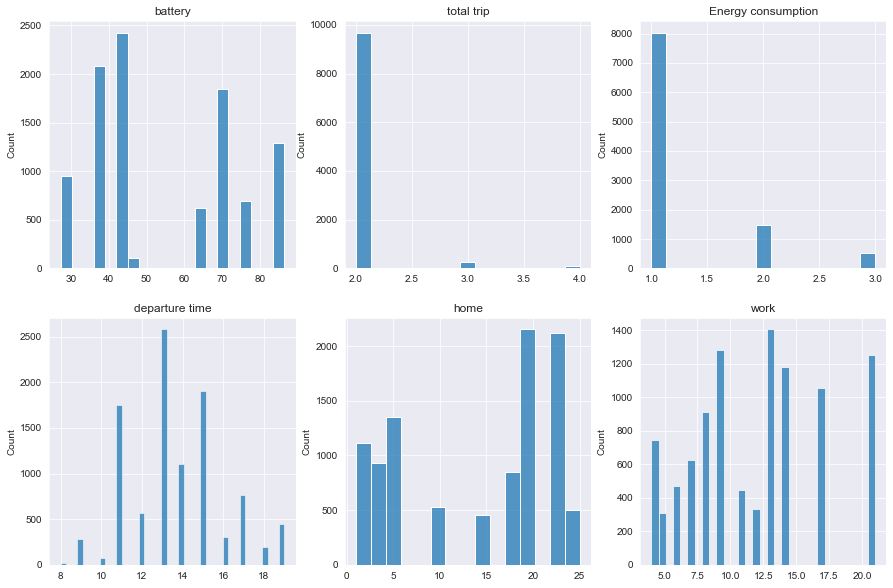

In [12]:
#visualize input
def calculate_ev_stack(veh):

    batt = []
    total_trip = []
    lo_chg = []
    dpr_t = []
    home = []
    work = []
    for i, evi in veh.EV_profile.items():
        batt.append(evi.batt)
        total_trip.append(evi.total_trip)
        lo_chg.append(evi.chg_lo)
        dpr_t.append(evi.start_t)
        home.append(evi.home)
        work.append(evi.work)
    return batt,total_trip,lo_chg,dpr_t,home,work

x1,x2,x3,x4,x5,x6 = calculate_ev_stack(ev)

fig, ax = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)
ax[0,0].set_title("battery")
sns.histplot(x1, ax = ax[0,0])

ax[0,1].set_title("total trip")
sns.histplot(x2, ax = ax[0,1])

ax[0,2].set_title("Energy consumption")
sns.histplot(x3, ax = ax[0,2])

ax[1,0].set_title("departure time")
sns.histplot(x4, ax = ax[1,0])

ax[1,1].set_title("home")
sns.histplot(x5, ax = ax[1,1])

ax[1,2].set_title("work")
sns.histplot(x6, ax = ax[1,2])

### 2 run the simulation

In [13]:
# dump-charge scenario (ev = 100000)
log = log(288,ev.number)
ev_load_p = np.zeros([48*6,6]) #ev_load_array
ev_load_q = np.zeros([48*6,6]) #ev_load_array
n_day = 0
log_sort = []
log_ev = []
matrix = charging_matrix(6,3,48)

for t in range(288):
    # check day changed
    if t % 48 == 0 and t > 0:
        n_day = n_day + 1

    # ev section
    status_calculation(ev=ev,t=t,n_day=n_day)
    sort = autenti_ev(ev=ev,control=1,t=t)
    datatrack(ev,matrix,t)
    charging_ev(ev,ev_load_p,t,log)

<AxesSubplot:title={'center':'Load'}, xlabel='time', ylabel='power'>

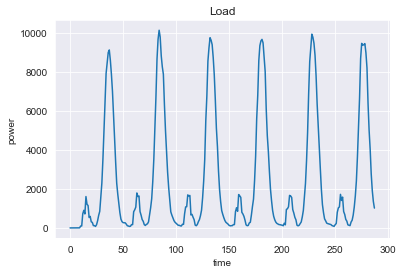

In [14]:
# visualize
df_p = {'time':np.arange(0,288),'power':ev_load_p.sum(axis=1)}
df_p = pd.DataFrame.from_dict(df_p)
fig, ax = plt.subplots()
ax.set_title("Load")
sns.lineplot(data=df_p,x='time',y='power', ax = ax)

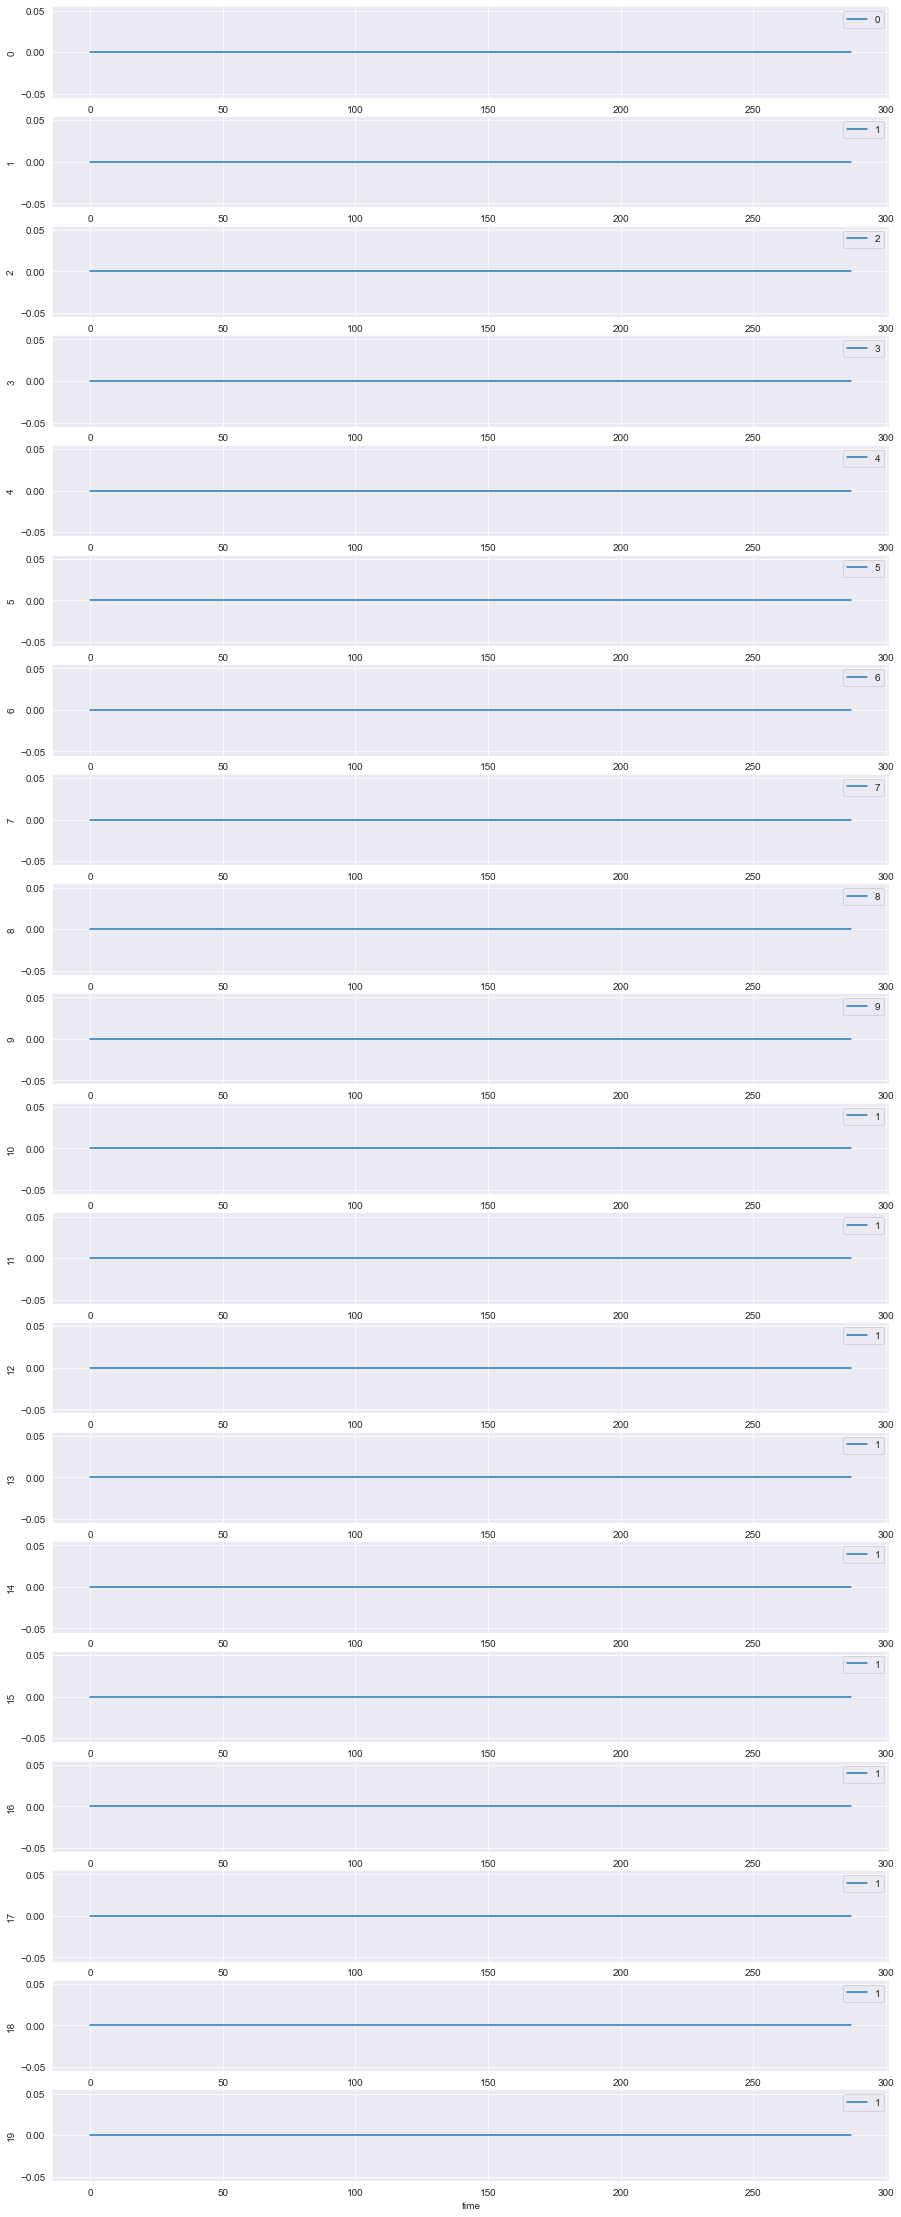

In [15]:
#visualize example of soc
#change setting in project class file uncomment log variable
df_soc_10 = pd.DataFrame(log.soc[:,:20])
df_soc_10['time'] = np.arange(0,288)

fig, ax = plt.subplots(20)
fig.set_figwidth(15)
fig.set_figheight(40)

for i in range(20):
    sns.lineplot(data=df_soc_10,x='time',y=i, ax = ax[i])
    ax[i].legend(str(i))

# EV simulation w/o control load profile (Autorun)

In [16]:
#setting input
start_ev =10000
end_ev = 130000
number = np.arange(start_ev,end_ev,5000)
load_log = {}
matrix = charging_matrix(6,3,48)

for i in number:

    ev = EV_data()
    ev.download_EV()
    ev.create_ev(i)
    ev.setting_ev_profile()
    ev.cal_geomatic_grid()

    # dump-charge scenario

    ev_load_p = np.zeros([48*6,6]) #ev_load_array
    ev_load_q = np.zeros([48*6,6]) #ev_load_array
    n_day = 0
    for t in range(288):
        # check day changed
        if t % 48 == 0 and t > 0:
            n_day = n_day + 1

        # ev section
        status_calculation(ev=ev,t=t,n_day=n_day)
        sort = autenti_ev(ev=ev,control=1,t=t)
        datatrack(ev,matrix,t)
        charging_ev(ev,ev_load_p,t,log)
    load_log[i] = ev_load_p

In [17]:
#### save load
# with open('ev_load4.obj', 'wb') as file:
#     pickle.dump(load_log,file)
# with open('matrix3.obj', 'wb') as file:
#     pickle.dump(matrix,file)

In [18]:
##check file
# with open('ev_load4.obj', 'rb') as file:
#     load_test = pickle.load(file)